# 22AM021 - HEMANT KUMAR SACHDEV FEATURE ENGINEERING ASSIGNMENT-1


## Setup and Imports

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

np.random.seed(42)


## Load the Dataset

In [27]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/ann-train.data"
col_names = ["target"] + [f"feature_{i}" for i in range(1, 22)]
data = pd.read_csv(url, delim_whitespace=True, header=None, names=col_names)

data['target'] = data['target'].apply(lambda x: 1 if x == 1 else 0)
features = data.drop("target", axis=1)
labels = data["target"]


##  Data Preprocessing

In [28]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


## Implementing Anomaly Detection Methods

### a) Z-Score Based Anomaly Detection

In [29]:
z_scores = np.abs(zscore(features_scaled))
z_score_outliers = (z_scores > 3).any(axis=1)

print("Z-score Outliers:", np.sum(z_score_outliers))


Z-score Outliers: 1195


### b) Mahalanobis Distance-Based Anomaly Detection

In [30]:
elliptic_env = EllipticEnvelope(contamination=0.05)
mah_outliers = elliptic_env.fit_predict(features_scaled) == -1

print("Mahalanobis Outliers:", np.sum(mah_outliers))


Mahalanobis Outliers: 189


### c) Local Outlier Factor (LOF)

In [31]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_outliers = lof.fit_predict(features_scaled) == -1

print("LOF Outliers:", np.sum(lof_outliers))


LOF Outliers: 189


### d) Isolation Forest

In [32]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_outliers = iso_forest.fit_predict(features_scaled) == -1

print("Isolation Forest Outliers:", np.sum(iso_outliers))


Isolation Forest Outliers: 189


### e) One-Class SVM


In [33]:
oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)
svm_outliers = oc_svm.fit_predict(features_scaled) == -1

print("One-Class SVM Outliers:", np.sum(svm_outliers))


One-Class SVM Outliers: 186


## Evaluation and Comparison

In [34]:
results = pd.DataFrame({
    "True Label": labels,
    "Z-Score": z_score_outliers,
    "Mahalanobis": mah_outliers,
    "LOF": lof_outliers,
    "Isolation Forest": iso_outliers,
    "One-Class SVM": svm_outliers
})

for method in results.columns[1:]:
    results[method] = results[method].astype(int)

for method in results.columns[1:]:
    print(f"\n{method} Method:")
    print(classification_report(results["True Label"], results[method]))
    print("Confusion Matrix:\n", confusion_matrix(results["True Label"], results[method]))



Z-Score Method:
              precision    recall  f1-score   support

           0       1.00      0.68      0.81      3772
           1       0.00      0.00      0.00         0

    accuracy                           0.68      3772
   macro avg       0.50      0.34      0.41      3772
weighted avg       1.00      0.68      0.81      3772

Confusion Matrix:
 [[2577 1195]
 [   0    0]]

Mahalanobis Method:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      3772
           1       0.00      0.00      0.00         0

    accuracy                           0.95      3772
   macro avg       0.50      0.47      0.49      3772
weighted avg       1.00      0.95      0.97      3772

Confusion Matrix:
 [[3583  189]
 [   0    0]]

LOF Method:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      3772
           1       0.00      0.00      0.00         0

    accuracy                           

## Visualization of Anomalies

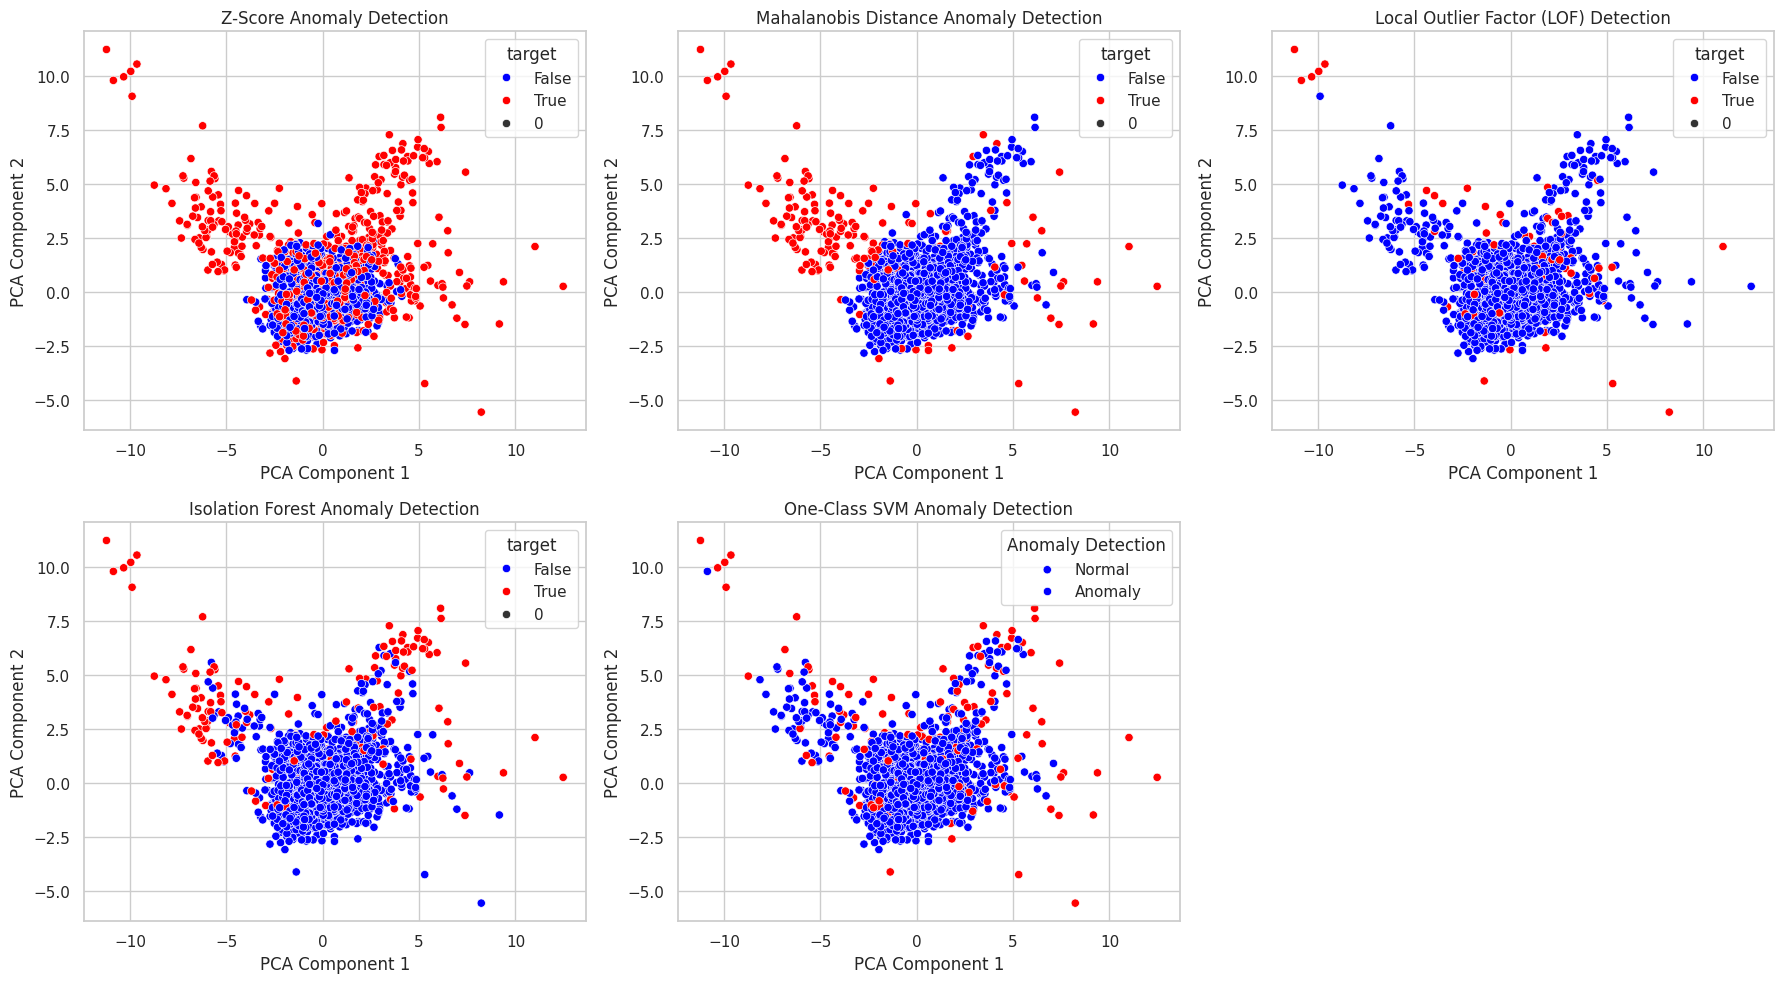

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled)

plt.figure(figsize=(18, 10))
sns.set(style="whitegrid")

palette = {0: 'blue', 1: 'red'}

plt.subplot(2, 3, 1)
plt.title("Z-Score Anomaly Detection")
sns.scatterplot(x=features_2d[:, 0], y=features_2d[:, 1], hue=z_score_outliers, palette=palette, style=labels)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.subplot(2, 3, 2)
plt.title("Mahalanobis Distance Anomaly Detection")
sns.scatterplot(x=features_2d[:, 0], y=features_2d[:, 1], hue=mah_outliers, palette=palette, style=labels)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.subplot(2, 3, 3)
plt.title("Local Outlier Factor (LOF) Detection")
sns.scatterplot(x=features_2d[:, 0], y=features_2d[:, 1], hue=lof_outliers, palette=palette, style=labels)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.subplot(2, 3, 4)
plt.title("Isolation Forest Anomaly Detection")
sns.scatterplot(x=features_2d[:, 0], y=features_2d[:, 1], hue=iso_outliers, palette=palette, style=labels)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.subplot(2, 3, 5)
plt.title("One-Class SVM Anomaly Detection")
sns.scatterplot(x=features_2d[:, 0], y=features_2d[:, 1], hue=svm_outliers, palette=palette, style=labels)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.tight_layout()
plt.legend(title="Anomaly Detection", loc="upper right", labels=["Normal", "Anomaly"])
plt.show()
